In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from PIL import Image
import colorsys
import math

In [2]:
ds_train = keras.utils.image_dataset_from_directory(
    "C:\\Private\\BiomeVision\\dataset-03--09-04-2022---1-out-grouped",
    image_size=(256,128),
    seed=123,
    validation_split=0.2,
    subset="training"
)
ds_validation = keras.utils.image_dataset_from_directory(
    "C:\\Private\\BiomeVision\\dataset-03--09-04-2022---1-out-grouped",
    image_size=(256,128),
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 59103 files belonging to 18 classes.
Using 47283 files for training.
Found 59103 files belonging to 18 classes.
Using 11820 files for validation.


In [15]:
ds_train.class_names

['badlands',
 'birch_forest',
 'cave',
 'dark_forest',
 'desert',
 'flower_forest',
 'forest',
 'ice',
 'jungle',
 'mountain',
 'mycelium',
 'ocean',
 'plains',
 'river',
 'savanna',
 'snowy',
 'swamp',
 'taiga']

In [12]:
class MyLayer(layers.Layer):
    def __int__(self):
        super()

    def call(self, inputs):
        print("called: ")
        print(inputs)
        return inputs

In [114]:
class ColorExtractionnnnnn(layers.Layer):
    def __int__(self, **kwargs):
        super(ColorExtraction, self).__init__(**kwargs)

    def call(self, inputs):
        print("called: ")
        print(inputs)
        return inputs

In [188]:
class ColorExtraction(layers.Layer):
    def __int__(self, **kwargs):
        super(ColorExtraction, self).__init__(**kwargs)

    def call(self, inputs):
        print("called: ")
        print(inputs)

        colors = {}

        for r in range(26):
            r = r * 10
            for g in range(26):
                g = g * 10
                for b in range(26):
                    b = b * 10
                    color = (r, g, b)
                    colors[color] = 0

        if hasattr(inputs, "numpy"):
            for pixel in inputs.numpy().reshape(-1, 3):
                (r, g, b) = pixel[0], pixel[1], pixel[2]
                r = math.floor(r / 10) * 10
                g = math.floor(g / 10) * 10
                b = math.floor(b / 10) * 10
                color = (float(r), float(g), float(b))
                colors[color] += 1

        arr = np.array(list(colors.values()))
        arr = arr / ( np.zeros(arr.shape) + (inputs.shape[1]*inputs.shape[2] / 3) )
        result = tf.expand_dims(tf.convert_to_tensor(arr), 0)

        print("result shape: ")
        print(result.shape)

        return result

In [4]:
class ColorExtraction2(layers.experimental.preprocessing.PreprocessingLayer):
    def __init__(self, **kwargs):
        super(ColorExtraction2, self).__init__(**kwargs)

    def call(self, inputs):
        print("called: ")
        print(inputs)

        colors = {}

        for r in range(26):
            r = r * 10
            for g in range(26):
                g = g * 10
                for b in range(26):
                    b = b * 10
                    color = (r, g, b)
                    colors[color] = 0

        if hasattr(inputs, "numpy"):
            for pixel in inputs.numpy().reshape(-1, 3):
                (r, g, b) = pixel[0], pixel[1], pixel[2]
                r = math.floor(r / 10) * 10
                g = math.floor(g / 10) * 10
                b = math.floor(b / 10) * 10
                color = (float(r), float(g), float(b))
                colors[color] += 1

        arr = np.array(list(colors.values()))
        arr = arr / ( np.zeros(arr.shape) + (inputs.shape[1]*inputs.shape[2] / 3) )
        result = tf.expand_dims(tf.convert_to_tensor(arr), 0)

        print("result shape: ")
        print(result.shape)

        return result

In [126]:
# inputs = layers.Input(shape=(256, 128, 3))
# color = ColorExtraction()(inputs)
# color = ColorExtraction()(color)
# tmp = layers.Flatten(inputs)
# outputs = layers.Dense(5, activation="softmax")(tmp)
# model = keras.Model(inputs=inputs, outputs=outputs, name="custom_color_model")

# data = np.random.rand(256, 128, 3)

model = models.Sequential()
# model.add(layers.Dense(120, activation="relu"))
model.add(ColorExtraction2())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    # loss=tf.keras.losses.CategoricalCrossentropy(),
    # loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)

history = model.fit(
    ds_train,
    epochs=2,
    validation_data=ds_validation,
    verbose=1
)

Epoch 1/2
called: 
Tensor("Placeholder:0", shape=(None, 256, 128, 3), dtype=float32)
result shape: 
(1, 17576)
called: 
Tensor("IteratorGetNext:0", shape=(None, 256, 128, 3), dtype=float32)
result shape: 
(1, 17576)
called: 
Tensor("IteratorGetNext:0", shape=(None, 256, 128, 3), dtype=float32)
result shape: 
(1, 17576)


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\jupit\anaconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\jupit\anaconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\jupit\AppData\Local\Temp\ipykernel_31904\3918080148.py", line 24, in <cell line: 24>
      history = model.fit(
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\jupit\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [1,18] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_7664]

In [122]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 color_extraction2_7 (ColorE  (1, 17576)               0         
 xtraction2)                                                     
                                                                 
 flatten_1 (Flatten)         (1, 17576)                0         
                                                                 
 dense_11 (Dense)            (1, 18)                   316386    
                                                                 
Total params: 316,386
Trainable params: 316,386
Non-trainable params: 0
_________________________________________________________________


In [24]:
keras.utils.plot_model(model, show_shapes=True)

"dot" with args ['-Tps', 'C:\\Users\\jupit\\AppData\\Local\\Temp\\tmp_0_sj3rw'] returned code: 1

stdout, stderr:
 b''
b''



AssertionError: 1

In [11]:
inputs = keras.Input(shape=(256, 128, 3))
x = layers.Conv2D(6, (5,5), activation="relu")(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(16, (5,5), activation="relu")(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation="relu")(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(18, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="custom_model")

In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [13]:
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_validation,
    verbose=1
)

Epoch 1/10
1478/1478 [==============================] - 218s 147ms/step - loss: 3.3752 - accuracy: 0.5516 - val_loss: 0.9567 - val_accuracy: 0.7207
Epoch 2/10
1478/1478 [==============================] - 213s 144ms/step - loss: 1.0413 - accuracy: 0.6964 - val_loss: 0.9326 - val_accuracy: 0.7206
Epoch 3/10
1478/1478 [==============================] - 205s 139ms/step - loss: 0.8970 - accuracy: 0.7364 - val_loss: 0.9068 - val_accuracy: 0.7336
Epoch 4/10
1478/1478 [==============================] - 206s 139ms/step - loss: 0.8390 - accuracy: 0.7535 - val_loss: 1.0588 - val_accuracy: 0.7063
Epoch 5/10
1478/1478 [==============================] - 202s 137ms/step - loss: 0.7364 - accuracy: 0.7791 - val_loss: 1.0383 - val_accuracy: 0.7284
Epoch 6/10
1478/1478 [==============================] - 205s 138ms/step - loss: 0.7039 - accuracy: 0.7894 - val_loss: 1.0622 - val_accuracy: 0.7305
Epoch 7/10
1478/1478 [==============================] - 205s 139ms/step - loss: 0.6260 - accuracy: 0.8130 - val_

In [14]:
model.save("C:\Private\BiomeVision\model1-2022-06-01b")

INFO:tensorflow:Assets written to: C:\Private\BiomeVision\model1-2022-06-01b\assets


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 124, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 62, 6)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 58, 16)       2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 29, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 61, 29, 16)        0         
                                                                 
 flatten (Flatten)           (None, 28304)             0

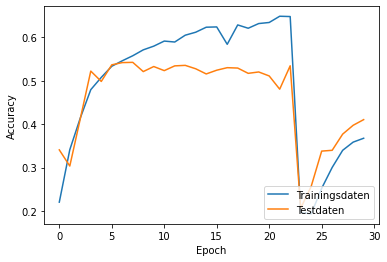

In [60]:
plt.plot(history.history['accuracy'], label='Trainingsdaten')
plt.plot(history.history['val_accuracy'], label = 'Testdaten')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.legend(loc='lower right')
plt.show()